# Digit Recognizer: MNIST Dataset

* Description
* Data
* Exploring the Data
* Feature Engineering
  * Feature: Density
  * Feature: Density by Region
  * Feature: Hole
* Model Training



## Description

[Kaggle Digit Recognizer Challenge](https://www.kaggle.com/c/digit-recognizer)

The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is.  As the competition progresses, we will release tutorials which explain different machine learning algorithms and help you to get started.


The data for this competition were taken from the MNIST dataset. The MNIST ("Modified National Institute of Standards and Technology") dataset is a classic within the Machine Learning community that has been extensively studied.  More detail about the dataset, including Machine Learning algorithms that have been tried on it and their levels of success, can be found at http://yann.lecun.com/exdb/mnist/index.html.

## Data

| File Name  | File Format      |   
|------------|------------------|
|  train     |   [.csv (73.22 mb)](https://www.kaggle.com/c/digit-recognizer/download/train.csv)  |
|  test      |    [.csv (48.75 mb)]( https://www.kaggle.com/c/digit-recognizer/download/test.csv) |


The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```

## Exploring the data

For conciseness, the data is already loaded on a R workspace.

In [1]:
library(ggplot2)
library(repr)

load("./digit-recon.RData")
source(file = "plotDigit.R")

Below you can observe the first 12 training entries on the dataset.

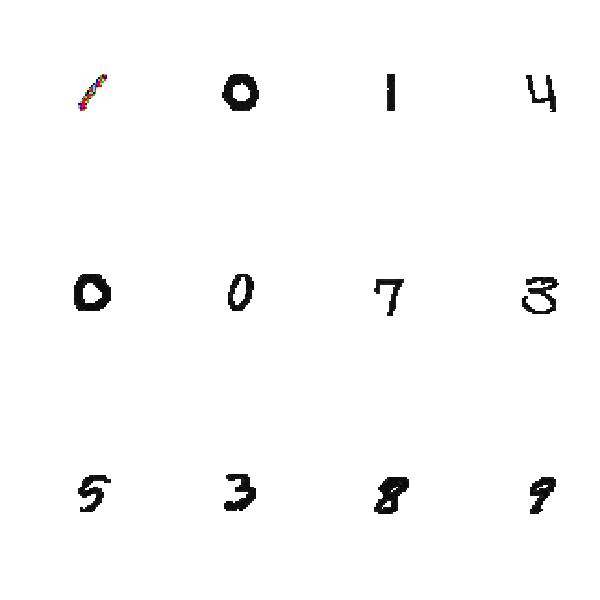

In [2]:
options(repr.plot.width=5, repr.plot.height=5)
generatePlots(train, range=12)

Overview of class distribution

In [3]:
table(train[,1])


   0    1    2    3    4    5    6    7    8    9 
4132 4684 4177 4351 4072 3795 4137 4401 4063 4188 

Overview of matrix features.

What is the accuracy of predicting the majority class?

In [4]:
round(max(table(train[,1]))/sum(table(train[,1])),digits = 5)

[1] 0.11152

In [5]:
summary(train[,1:12])

     label           pixel0      pixel1      pixel2      pixel3      pixel4 
 Min.   :0.000   Min.   :0   Min.   :0   Min.   :0   Min.   :0   Min.   :0  
 1st Qu.:2.000   1st Qu.:0   1st Qu.:0   1st Qu.:0   1st Qu.:0   1st Qu.:0  
 Median :4.000   Median :0   Median :0   Median :0   Median :0   Median :0  
 Mean   :4.457   Mean   :0   Mean   :0   Mean   :0   Mean   :0   Mean   :0  
 3rd Qu.:7.000   3rd Qu.:0   3rd Qu.:0   3rd Qu.:0   3rd Qu.:0   3rd Qu.:0  
 Max.   :9.000   Max.   :0   Max.   :0   Max.   :0   Max.   :0   Max.   :0  
     pixel5      pixel6      pixel7      pixel8      pixel9     pixel10 
 Min.   :0   Min.   :0   Min.   :0   Min.   :0   Min.   :0   Min.   :0  
 1st Qu.:0   1st Qu.:0   1st Qu.:0   1st Qu.:0   1st Qu.:0   1st Qu.:0  
 Median :0   Median :0   Median :0   Median :0   Median :0   Median :0  
 Mean   :0   Mean   :0   Mean   :0   Mean   :0   Mean   :0   Mean   :0  
 3rd Qu.:0   3rd Qu.:0   3rd Qu.:0   3rd Qu.:0   3rd Qu.:0   3rd Qu.:0  
 Max.   :0   Max.   :0 

From above several pixels are empty for the entire dataset. How many of them there are?

In [6]:
sum(apply(train,2,function(r){ if(sum(r) == 0) 1 else 0   }))

[1] 76

## Feature Engineering

### Density

This feature is defined as the sum of all entries in the matrix representing the digit. Below I have generated the same 12 digits as before, together with their density values.

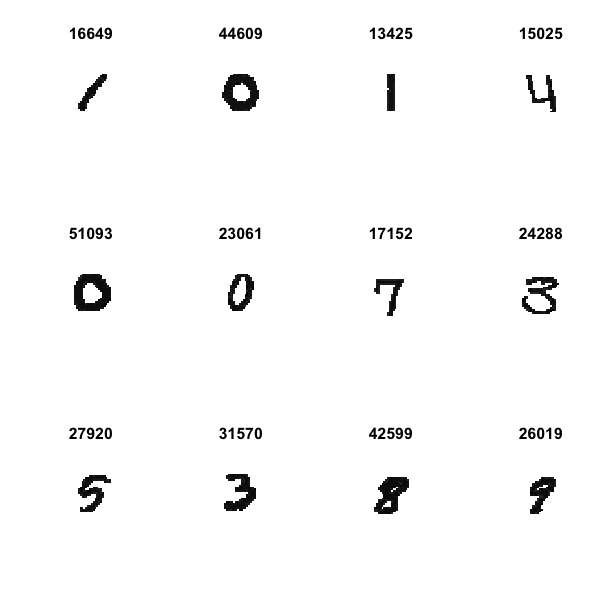

In [7]:
density <- apply(train[,-1],1,function(r){ sum(r) })

options(repr.plot.width=5, repr.plot.height=5)
generatePlots(train,labels=density)

How well does this feature discriminate the data?

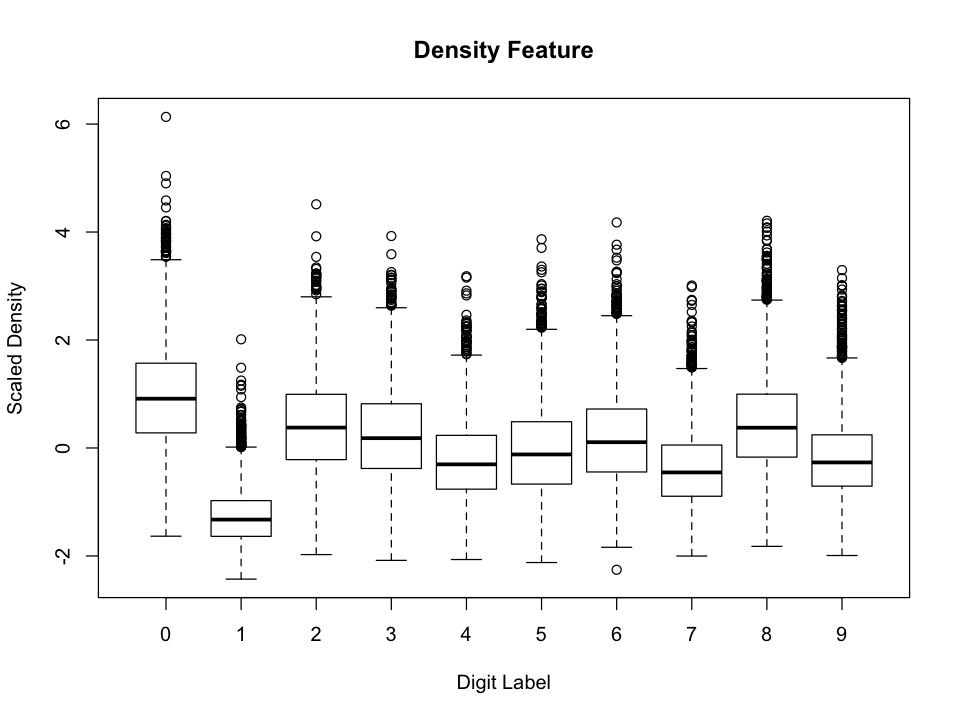

In [8]:
options(repr.plot.width=8, repr.plot.height=6)


dat <- data.frame(as.factor(train[,1]),scale(density))
names(dat) <- c("label","density")

boxplot(density~label,data=dat[,],main="Density Feature", 
  	xlab="Digit Label", ylab="Scaled Density")

From the boxplot above it is clear that this feature discriminates well between 1 and the remaining digits, with the exception of outliers.

## Density by Region

This is a collection of four features; the density, as defined above, for the digit divided into four quadrants.

numeric(0)

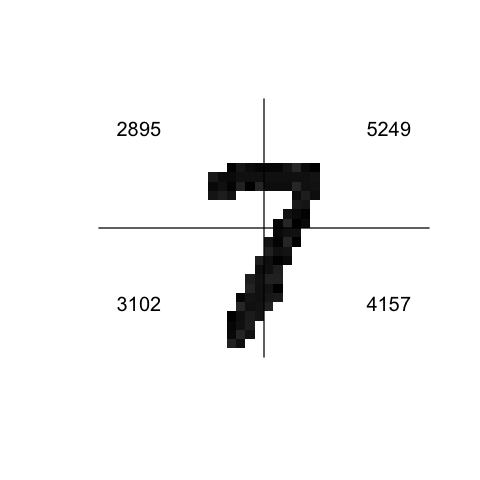

In [9]:
options(repr.plot.width=4, repr.plot.height=4)

digit <- matrix(as.numeric(train[19,-1]),28,28)

# Density by region
topLeftDensity <- sum( digit[1:14,1:14] )
topRightDensity <- sum(digit[14:28,1:14])
bottomLeftDensity <- sum(digit[1:14,14:28])
bottomRightDensity <- sum(digit[14:28,14:28])

plotDigit(train[19,])+abline(h = 0.5) + abline(v=0.5)+
  text(0,0.9,labels=paste(topLeftDensity)) + text(1,0.9,labels=paste(topRightDensity))  +
  text(0,0.2,labels=paste(bottomLeftDensity)) + text(1,0.2,labels=paste(bottomRightDensity)) 


Does this group of features discriminate the dataset well?

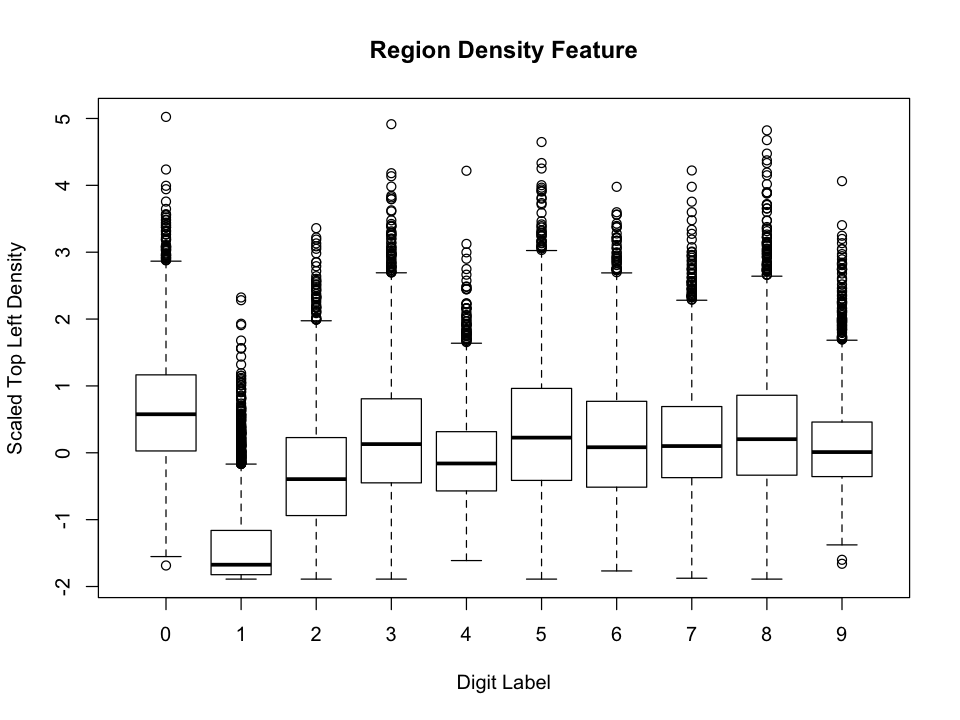

In [10]:
digitAsMatrix <- function(r){
  matrix(as.numeric(r),28,28)
}

regionDensity <- function(row,region){
  digit <- digitAsMatrix(row)  
    
  # region 1  1:14,  1:14
  # region 2  14:28, 1:14
  # region 3  1:14,  14:28
  # region 4  14:28, 14:28
  
  first <-  (1+(region-1)%%2*13):(14+(region-1)%%2*14)
  second <- if(region<=2) 1:14 else 14:28
    
  sum( digit[first,second] )    
}
      
topLeftDensity <- apply(train[,-1],1,function(x){regionDensity(x,1)})

# Top Left
dat <- data.frame(as.factor(train[,1]),scale(topLeftDensity))
names(dat) <- c("label","density")
      
      
options(repr.plot.width=8, repr.plot.height=6)

boxplot(density~label,data=dat,main="Region Density Feature", 
  	xlab="Digit Label", ylab="Scaled Top Left Density")
      

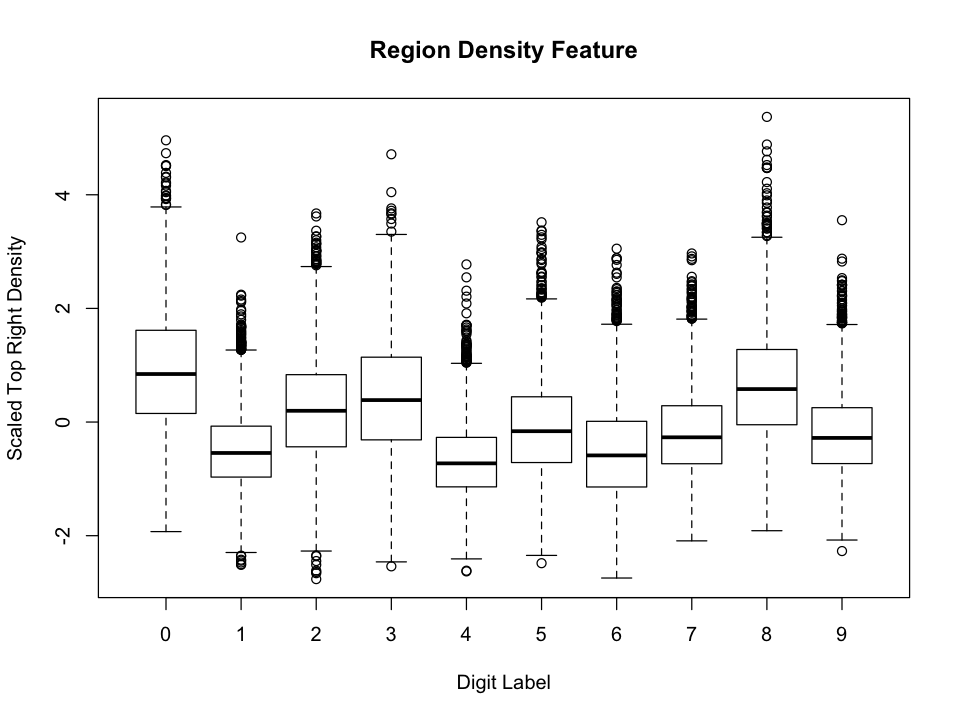

In [11]:
# Top Right
topRightDensity <- apply(train[,-1],1,function(x){regionDensity(x,2)})

dat <- data.frame(as.factor(train[,1]),scale(topRightDensity))
names(dat) <- c("label","density")
      
boxplot(density~label,data=dat,main="Region Density Feature", 
  	xlab="Digit Label", ylab="Scaled Top Right Density")

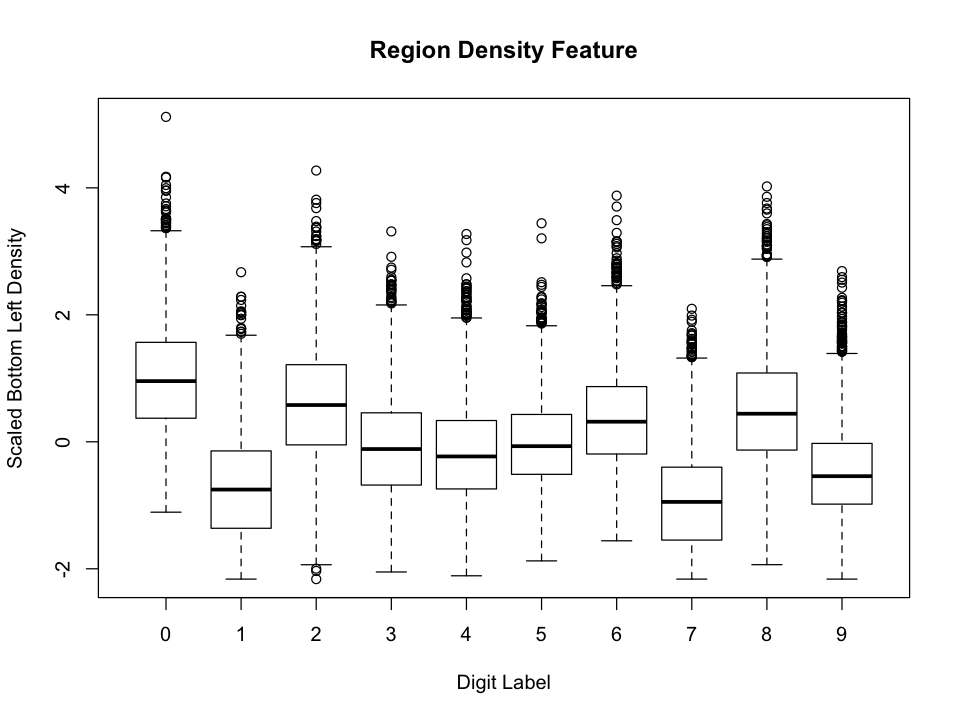

In [12]:
# Bottom Left
bottomLeftDensity <- apply(train[,-1],1,function(x){regionDensity(x,3)})

dat <- data.frame(as.factor(train[,1]),scale(bottomLeftDensity))
names(dat) <- c("label","density")
      
boxplot(density~label,data=dat,main="Region Density Feature", 
  	xlab="Digit Label", ylab="Scaled Bottom Left Density")
      


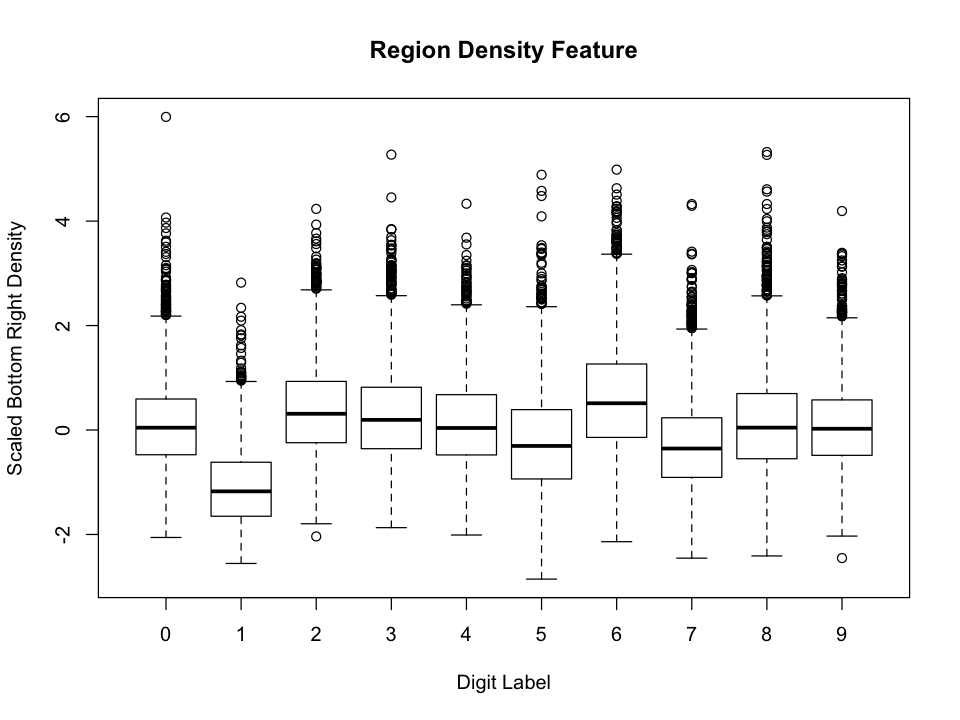

In [13]:
# Bottom Right
bottomRightDensity <- apply(train[,-1],1,function(x){regionDensity(x,4)})

dat <- data.frame(as.factor(train[,1]),scale(bottomRightDensity))
names(dat) <- c("label","density")
      
boxplot(density~label,data=dat,main="Region Density Feature", 
  	xlab="Digit Label", ylab="Scaled Bottom Right Density")

From the plots above, the feature that discritized best the data is the bottom left density.

### Lines

This group of features describes the length the location of the longest and shortest line used to draw a digit.

### Heavy Bottom Integers

A simple feature that may distinguish digits such as 6 and 9 are if they bottom heavy (more non empty cells in the bottom).

numeric(0)

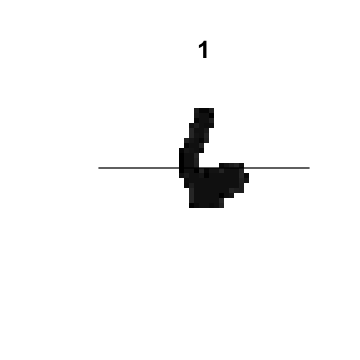

numeric(0)

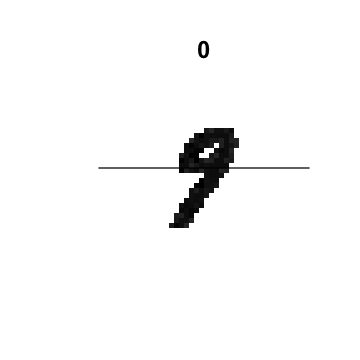

In [14]:
options(repr.plot.width=3, repr.plot.height=3)

botHeavy <- function(row){
      digit <- digitAsMatrix(row[,-1])  
    
      if( sum(digit[,14:28] != 0) > sum(digit[,1:14] != 0) ) 1 else 0
}

six <- train[ train[,1] == 6,][2,]
nine <- train[ train[,1] == 9,][2,]

plotDigit(six,label=botHeavy(six)) + abline(h = 0.5)
plotDigit(nine,label=botHeavy(nine)) + abline(h = 0.5)
          

However, it is simple to see that this is a very poor feature for the dataset, with around 85% of the training data being bottom heavy.

In [15]:
botHeavies <- apply(train[,-1],1,botHeavy)
sum(botHeavies)/nrow(train)


ERROR: Error in row[, -1]: incorrect number of dimensions


ERROR: Error in eval(expr, envir, enclos): object 'botHeavies' not found


### Holes

This feature aims at detecting holes in digits. This is a slightly more involved features than the previous ones.
Here a check is made in the horizontal and vertical directions for gap. First, a gap in the vertical direction is identified then, for the range of x values contained in the gap, a check for gaps in the horizontal direction is made. A hole is defined when for a given gap in the vertical direction, it is bounded in the horizontal direction. Several check are done in the other direction. 


In [16]:
 ## Detection of a 1D gap
 gap <- function(x){
    val <- 0
    gap <- c()
    
    row <- x != 0
    
    hGap <- F
    start <- 0
    
  for(e in 1:(length(row)-1)){
    if(x[e] !=0 && x[e+1]==0) { #  Gap Starts
     hGap <- T
     start <- e
    }
    else if(hGap) {
        if(e < length(row) && x[e] == 0 && x[e+1]!=0){ # Gap Ends
           gap <- c(gap,list(c(start,e)))
           #print(gap)
           hGap <- F
        }
         
    }
    else {
        hGap <- F
    }
  }

  c(gap)
 }

dHole <- function(row,hole=12){

       
 digit <- digitAsMatrix(row) 
 h <- F
  
  g1 <- gap(digit[hole,])
      
  if(!is.null(g1)){
    for(e in g1){
      h <- T
      for(j in (e[1]):e[2]){
        g2 <- gap(digit[,j])
                
        if(is.null(g2)){
            h <- F
        }
    }    
   }
  }
    val <- list()
    val$h <- h
    val$gap <- g1
    val
}

gapHole <- function(x,gapSize =5, start=10){
    holes <- c()
    for(i in 1:gapSize){
        holes <- c(holes, dHole(x,hole=(start+i))$h)
    }
    s<-sum(holes)
    if(s>=1) 1 else 0
}
        

However, many digits are disformed and detecting a gap is difficult. To reduce the risk of non-detection the check is done by a range of vertical lines (and thus a range of horizontal lines for each vertical line). The feature signifies the number of holes detected.

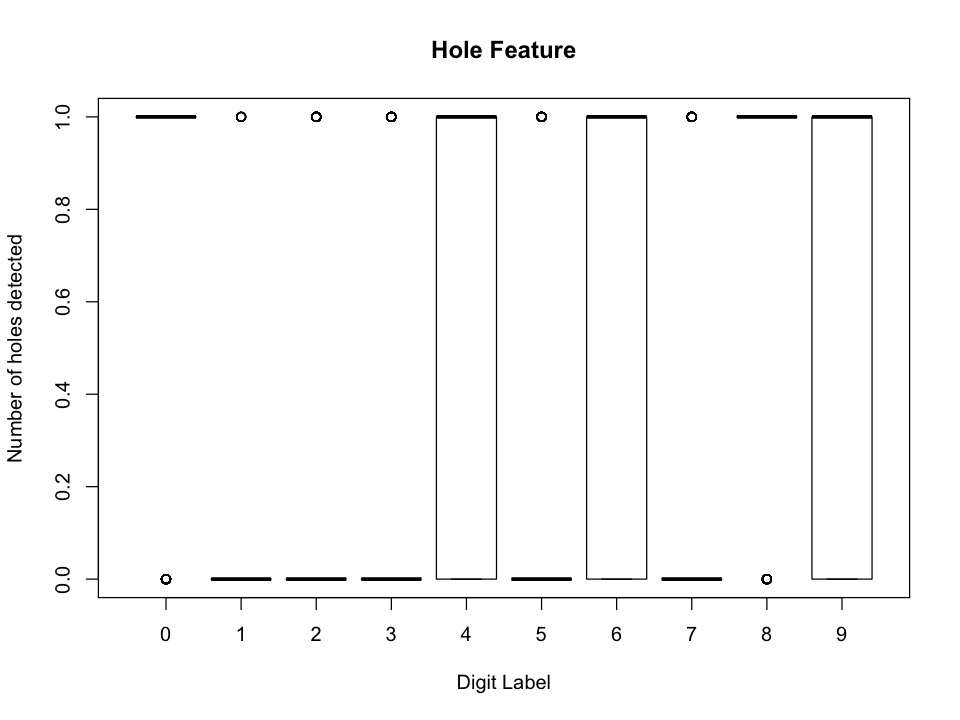

In [17]:
holes <- apply(train[,-1],1, gapHole)

dat <- data.frame(as.factor(train[,1]),holes)
names(dat) <- c("label","holeNum")

options(repr.plot.width=8, repr.plot.height=6)

boxplot(holeNum~label,data=dat,main="Hole Feature", 
  	xlab="Digit Label", ylab="Number of holes detected")

From the box plot above it is easy to see that holes are detected on digits 0, 4, 6, 8, and 9. This feature then provides a good way to discriminate the data.

## Model Training

In [18]:
trainset <- data.frame(label=train[,1],density,topRightDensity,topLeftDensity,bottomLeftDensity,bottomRightDensity,hole=holes)
trainset$label <- as.factor(train[,1])
head(trainset)

# Build test set
test.density <- apply(test,1,function(x){sum(x)})
test.topLeftDensity <- apply(test,1,function(x){regionDensity(x,1)})
test.topRightDensity <- apply(test,1,function(x){regionDensity(x,2)})
test.bottomLeftDensity <- apply(test,1,function(x){regionDensity(x,3)})
test.bottomRightDensity <- apply(test,1,function(x){regionDensity(x,4)})
test.hole <- apply(test,1, gapHole)

testset <- data.frame(density=test.density,topLeftDensity=test.topLeftDensity,topRightDensity=test.topRightDensity,bottomLeftDensity=test.bottomLeftDensity,bottomRightDensity=test.bottomRightDensity,hole=test.hole)
head(testset)

,label,density,topRightDensity,topLeftDensity,bottomLeftDensity,bottomRightDensity,hole
1,1,16649,8318,528,7830,2359,0
2,0,44609,12057,10894,12397,13054,1
3,1,13425,5739,2152,3510,7384,0
4,4,15025,2721,3274,3521,6607,0
5,0,51093,14730,12235,14409,13982,1
6,0,23061,7105,4737,6867,6705,1


,density,topLeftDensity,topRightDensity,bottomLeftDensity,bottomRightDensity,hole
1,39404,4692,11652,13229,13532,0
2,39933,9316,10908,11088,11889,1
3,14870,2701,5236,4811,4751,1
4,16208,2391,5499,5338,4933,1
5,24294,3067,9687,6182,8719,1
6,22745,6856,5181,4371,9671,0


### K Nearest

In [ ]:
library(class)

# Cross validation
ks <- seq(1,100,5)

crossvalidation <- function(){
  accuracy <- c()
  step <- seq(1,length(trainset[,1]),10)
    
  for(j in ks){
      knn.cv <- knn.cv(train = scale(trainset[,-1]), cl = trainset[,1],k = j, l = 0)
      accuracy <- c(mean(knn.cv == trainset[,1]), accuracy)
  }
  accuracy
}

acc <- crossvalidation()

ERROR: Error in plot.window(...): invalid 'xlim' value


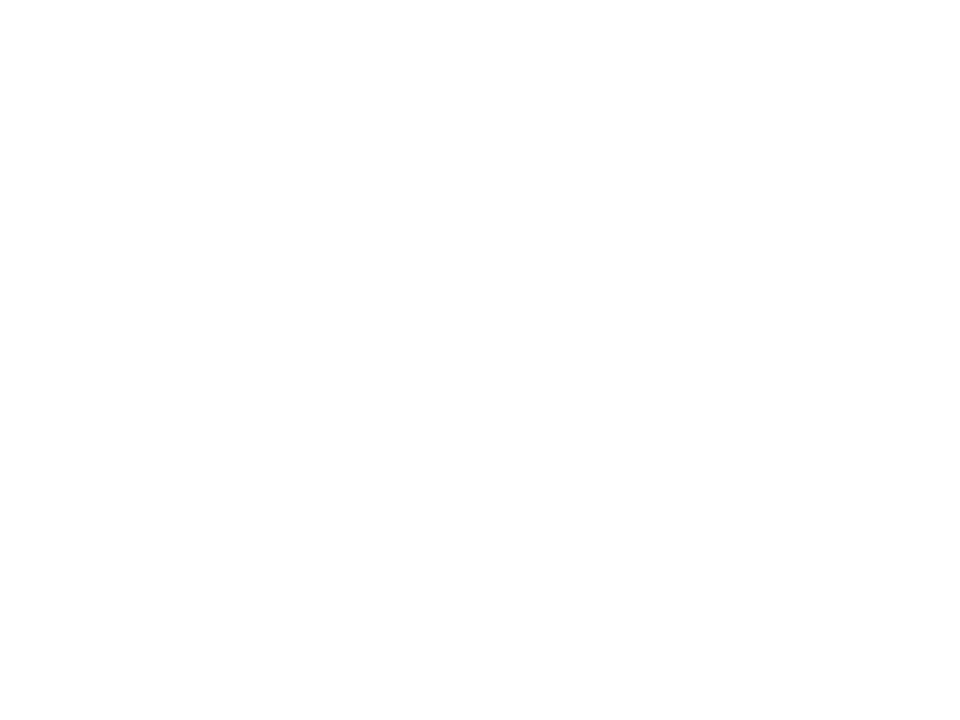

In [42]:
plot(ks,acc,type='b',col=ifelse(ks==which.min(acc)),"red","black")

In [43]:
knn.fit <- knn.cv(train = scale(trainset[,-1]),test= scale(trainset[,-1]) cl = trainset[,1],k = 20, l = 0)
table(knn.fit,trainset[,1])
mean(knn.fit == trainset[,1])

ERROR: Error in parse(text = x, srcfile = src): <text>:1:75: unexpected symbol
1: knn.fit <- knn.cv(train = scale(trainset[,-1]),test= scale(trainset[,-1]) cl
                                                                              ^
